In [1]:
import os
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [27]:
pd.options.mode.copy_on_write = True

In [10]:
basin_mapping_SVAR = {
    'BASIN_NR_1': 'Bottenviken',
    'BASIN_NR_2': 'Norra Kvarken',
    'BASIN_NR_3': 'Bottenhavet',
    'BASIN_NR_4': 'Ålands hav',
    'BASIN_NR_5': 'Skärgårdshavet',
    'BASIN_NR_6': 'Finska viken',
    'BASIN_NR_7': 'Norra Gotlandshavet',
    'BASIN_NR_8': 'Västra Gotlandshavet',
    'BASIN_NR_9': 'Östra Gotlandshavet',
    'BASIN_NR_10': 'Rigabukten',
    'BASIN_NR_11': 'Gdanskbukten',
    'BASIN_NR_12': 'Bornholmshavet & Hanöbukten',
    'BASIN_NR_13': 'Arkonahavet & Södra Öresund',
    'BASIN_NR_14': 'Bälthavet',
    'BASIN_NR_15': 'Öresund',
    'BASIN_NR_16': 'Kattegatt',
    'BASIN_NR_17': 'Skagerrak',
}

In [3]:
def generate_filepaths(directory, pattern='', not_pattern='DUMMY_PATTERN',
                       pattern_list=[], endswith='',
                       only_from_dir=True):
    for path, subdir, fids in os.walk(directory):
        if only_from_dir:
            if path != directory:
                continue
        # Generator function (uses yield) https://docs.python.org/3/glossary.html#term-generator
        for f in fids:
            if pattern in f and not_pattern not in f and f.endswith(endswith):
                if any(pattern_list):
                    for pat in pattern_list:
                        if pat in f:
                            yield os.path.abspath(os.path.join(path, f))
                else:
                    yield os.path.abspath(os.path.join(path, f))

Set up dataframe containing geom definitions for each selected basin and append the total area of the geom in a new area column

In [4]:
areas = gp.read_file(
        r'c:\Arbetsmapp\Shapefiler\Sub-basins_Baltic_Sea\Havsomr_SVAR_2016_3b.shp'
)
areas = areas.to_crs(epsg=3006)
areas_geometries = areas[['BASIN_NR', 'geometry']]
areas = areas_geometries.dissolve(by='BASIN_NR', as_index=False)
selected_basins = (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)
boolean_filter = areas['BASIN_NR'].isin(selected_basins)
areas = areas.loc[boolean_filter, :].reset_index(drop=True)
areas['area'] = areas['geometry'].apply(lambda geom: int(geom.area))

<Axes: >

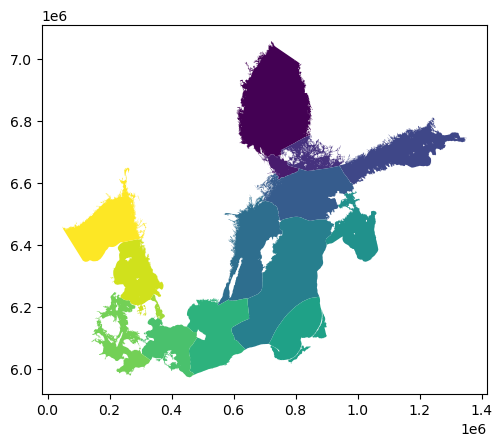

In [6]:
areas.plot('BASIN_NR')

In [7]:
data_dir = r'C:\Arbetsmapp\BAWS\Årsrapport 2023\Data_2002-2023\baws_rasterize\2002-2023'
file = data_dir + r'\cyano_daymap_20220815.tiff'

In [8]:
shp_file = data_dir + r'\cyano_daymap_20220815.shp'
gdf = gp.read_file(shp_file)

In [14]:
blooms = gdf[gdf['class'].isin([2, 3])]
selected_basin = areas[areas['BASIN_NR'].isin([12])]

In [15]:
basin_bloom_area = gp.overlay(blooms, selected_basin, how='intersection')

In [18]:
basin_bloom_area

,class,BASIN_NR,area,geometry
0,2,12,33668211507,"POLYGON ((580261.000 6219123.000, 579261.000 6..."
1,2,12,33668211507,"POLYGON ((575261.000 6218123.000, 574261.000 6..."
2,3,12,33668211507,"POLYGON ((573261.000 6218123.000, 573261.000 6..."
3,3,12,33668211507,"POLYGON ((575261.000 6218123.000, 575261.000 6..."
4,2,12,33668211507,"POLYGON ((517261.000 6217123.000, 517261.000 6..."
...,...,...,...,...
1263,2,12,33668211507,"POLYGON ((463261.000 6034123.000, 463261.000 6..."
1264,2,12,33668211507,"POLYGON ((462261.000 6028123.000, 462261.000 6..."
1265,2,12,33668211507,"POLYGON ((460261.000 6027123.000, 460261.000 6..."
1266,2,12,33668211507,"POLYGON ((461261.000 6024123.000, 461261.000 6..."


<Axes: >

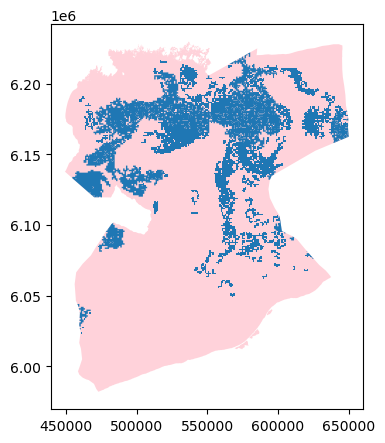

In [17]:
fig, ax = plt.subplots (figsize = (5,5))
selected_basin.plot(ax=ax, alpha=0.7, color='pink')
basin_bloom_area.plot(ax=ax)

In [ ]:
bloom_area = basin_bloom_area.area.sum()

In [ ]:
bloom_area / basin_12_area

In [19]:
selected_basin

,BASIN_NR,geometry,area
9,12,"POLYGON ((449029.888 6137863.106, 449177.826 6...",33668211507


In [42]:
for n in selected_basins:
    basin_nr = areas['BASIN_NR'].isin([n])
    basin_bloom_overlap = gp.overlay(blooms, areas[basin_nr], how='intersection')
    bloom_area_sum = basin_bloom_overlap.area.sum()
    areas.loc[basin_nr, 'bloom_area'] = bloom_area_sum
areas

,BASIN_NR,geometry,area,bloom_area
0,3,"POLYGON ((620922.743 6729219.402, 620757.133 6...",60609721586,2.039821e+09
1,4,"POLYGON ((709486.835 6669336.804, 709413.026 6...",4337600600,8.814282e+07
2,5,"POLYGON ((941642.960 6656019.222, 941484.624 6...",10883952173,1.010615e+08
3,6,"POLYGON ((984634.061 6596697.898, 984670.443 6...",30407673759,1.194335e+09
4,7,"POLYGON ((693957.780 6565996.762, 693875.447 6...",34845257524,8.088755e+09
5,8,"POLYGON ((549687.035 6208329.209, 549711.191 6...",34575748071,1.776576e+09
6,9,"POLYGON ((706381.131 6322005.715, 706379.902 6...",64599679622,1.270830e+10
7,10,"POLYGON ((899983.436 6399829.630, 899925.798 6...",18327887795,0.000000e+00
8,11,"POLYGON ((876400.422 6233011.174, 876417.638 6...",21965530085,4.298355e+06
9,12,"POLYGON ((449029.888 6137863.106, 449177.826 6...",33668211507,7.806345e+09


In [ ]:
# TODO
# Test that bloom_area is properly calculated (for loop with separate plots per figure)
# Dataset with time dimension